# Bernstein–Vazirani algorithm

This notebook runs the Bernstein–Vazirani algorithm on a local simulator and a QPU on Amazon Braket. 

# References 
[1] Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, doi:10.1137/S0097539796300921.


# Run on a local simulator

In [1]:
from braket.devices import LocalSimulator
from braket.tracking import Tracker

from braket.experimental.algorithms.bernstein_vazirani.bernstein_vazirani import (
    bernstein_vazirani_circuit,
    marginalize_measurements,
    plot_bitstrings,
)

tracker = Tracker()

local_simulator = LocalSimulator()

bv_circuit = bernstein_vazirani_circuit("100")

In [2]:
print(bv_circuit)

T  : |0|1| 2 |3|Result Types|
                           
q0 : -H---C---H-Sample(Z)----
          |                
q1 : -H-I-|-H---Sample(Z)----
          |                
q2 : -H-I-|-H---Sample(Z)----
          |                
q3 : -H-Z-X------------------

T  : |0|1| 2 |3|Result Types|


In [11]:
task = local_simulator.run(bv_circuit, shots=1000)
result = task.result()

/Users/drbeach/.pyenv/versions/3.9.5/envs/braket/lib/python3.9/site-packages/braket/default_simulator/simulator.py:265: UserWarning: You are running a noise-free circuit on the density matrix simulator. Consider running this circuit on the state vector simulator: LocalSimulator("default") for a better user experience.
  warnings.warn(


In [4]:
counts = marginalize_measurements(result.measurement_counts)
print(counts)

Counter({'100': 1000})


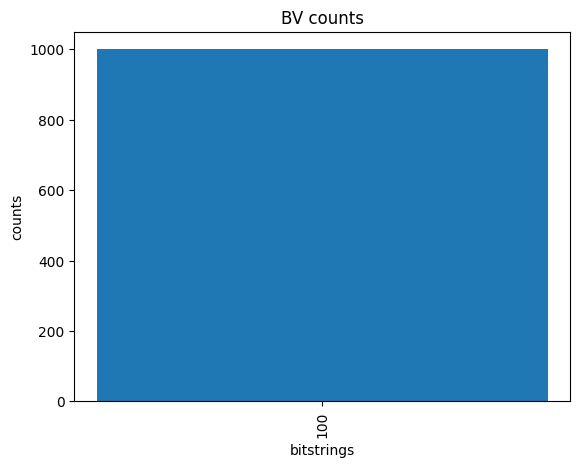

In [5]:
plot_bitstrings(counts, title="BV counts")

# Run on a noisy simulator

Let's try a noisy simulator

In [6]:
from braket.circuits.noises import BitFlip
from braket.devices import LocalSimulator

local_simulator = LocalSimulator("braket_dm")

noisy_bv_circuit = bernstein_vazirani_circuit("100").apply_readout_noise(BitFlip(0.05))
print(noisy_bv_circuit)

T  : |0|1| 2 |        3        |Result Types|
                                           
q0 : -H---C---H--------BF(0.05)-Sample(Z)----
          |                                
q1 : -H-I-|-H-BF(0.05)----------Sample(Z)----
          |                                
q2 : -H-I-|-H-BF(0.05)----------Sample(Z)----
          |                                
q3 : -H-Z-X---BF(0.05)-----------------------

T  : |0|1| 2 |        3        |Result Types|


In [7]:
task = local_simulator.run(noisy_bv_circuit, shots=1_000)
result = task.result()

counts = marginalize_measurements(result.measurement_counts)
print(counts)

Counter({'100': 862, '110': 53, '101': 46, '000': 31, '001': 3, '010': 3, '111': 2})


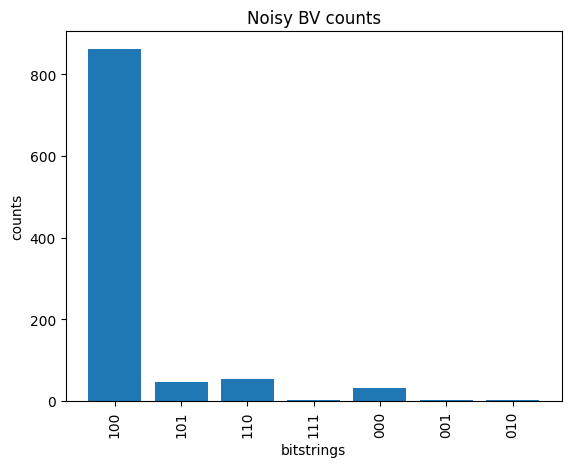

In [8]:
plot_bitstrings(counts, title="Noisy BV counts")

[Print the final costs]

In [9]:
print(
    f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost():.2f} USD"
)

Estimated cost to run this example: 0.00 USD


Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).